<a href="https://colab.research.google.com/github/rpaulos/CCADMACL_EXERCISES_COM232/blob/main/Exercise2B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EXERCISE 2B

Imagine you are a data scientist working for an international development organization. Your team wants to understand how countries differ in terms of economy, health, and social well-being. You have access to a dataset containing multiple indicators for countries worldwide, such as GDP per capita, life expectancy, child mortality, and population.

Your task is to discover natural groupings of countries using hierarchical clustering. By examining these clusters, you can identify patterns such as:

- Which countries are economically developed or developing

- How social and health indicators vary across regions

- Surprising similarities between countries from different continents

Answer each question by completing the corresponding code cell. **Do not remove or reorder cells.**



<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/71/IMF_advanced_economies_and_UN_least_developed_countries.svg/960px-IMF_advanced_economies_and_UN_least_developed_countries.svg.png"/>

## Dataset feature description

 - child mort - Death of children under 5 years of age per 1000 live births

- exports - Exports of goods and services per capita. Given as %age of the GDP per capita
- health - Total health spending per capita. Given as %age of GDP per capita
- import - Imports of goods and services per capita. Given as %age of the GDP per capita
- income - Net income per person
- inflation - The measurement of the annual growth rate of the Total GDP
- life_expec - The average number of years a new born child would live if the current mortality patterns are to remain the same
- total_fer - The number of children that would be born to each woman if the current age-fertility rates remain the same.
- gdpp - The GDP per capita. Calculated as the Total GDP divided by the total population.

In [3]:
import kagglehub
import os
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("rohan0301/unsupervised-learning-on-country-data")

print("Path to dataset files:", path)

if os.path.isdir(path):
  print(True)

contents = os.listdir(path)
contents

mydataset = path + "/" + contents[0]
mydataset


df = pd.read_csv(mydataset)

Using Colab cache for faster access to the 'unsupervised-learning-on-country-data' dataset.
Path to dataset files: /kaggle/input/unsupervised-learning-on-country-data
True


## 1. Import Required Libraries
Import the core libraries needed for data analysis, visualization, and clustering.

In [81]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering


## 2. Load the Dataset
Upload the CSV file for *the* **Country Data** dataset.

In [15]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rohan0301/unsupervised-learning-on-country-data")

print("Path to dataset files:", path)

if os.path.isdir(path):
  print(True)

contents = os.listdir(path)
contents

mydataset = path + "/" + contents[0]
mydataset


df = pd.read_csv(mydataset)


Using Colab cache for faster access to the 'unsupervised-learning-on-country-data' dataset.
Path to dataset files: /kaggle/input/unsupervised-learning-on-country-data
True


## 3. Exploring the Dataset

Display the first 10 rows of the dataset `(5 pts)`

- Show the initial records to understand the dataset's structure and variables.

In [16]:
# put your answer here
df.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


Display the shape of the dataset `(5 pts)`
- How many rows (countries) and how many features does the dataset contain?

In [17]:
# put your answer here
df.shape

(167, 10)

Show summary statistics using `describe()`. `(5 pts)`

In [18]:
# put your answer here
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


Check for missing values. `(5 pts)`

In [19]:
# put your answer here
df.isna().sum()

,0
country,0
child_mort,0
exports,0
health,0
imports,0
income,0
inflation,0
life_expec,0
total_fer,0
gdpp,0


## 4. Data Preprocessing

Select only the numerical columns for clustering `(5 pts)`
- Exclude any non-numeric fields, such as 'Country Name' or categorical variables.

In [20]:
# put your answer here
df = df.select_dtypes(include=[np.number])
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


Standardize the selected numerical features `(5 pts)`

- This ensures all features contribute equally to the distance calculations used in clustering.

In [52]:
# put your answer here
from sklearn.preprocessing import MinMaxScaler

cols_to_scale = ['income', 'gdpp', 'inflation']
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,0.008047,0.126144,56.2,5.82,0.003073
1,16.6,28.0,6.55,48.6,0.074933,0.080399,76.3,1.65,0.036833
2,27.3,38.4,4.17,31.4,0.098809,0.187691,76.5,2.89,0.040365
3,119.0,62.3,2.85,42.9,0.042535,0.245911,60.1,6.16,0.031488
4,10.3,45.5,6.03,58.9,0.148652,0.052213,76.8,2.13,0.114242


## 5. Exploratory Data Analysis

Generate a correlation heatmap
- Visualize the relationships between socioeconomic indicators. `(10 pts)`

<function matplotlib.pyplot.title(label: 'str', fontdict: 'dict[str, Any] | None' = None, loc: "Literal['left', 'center', 'right'] | None" = None, pad: 'float | None' = None, *, y: 'float | None' = None, **kwargs) -> 'Text'>

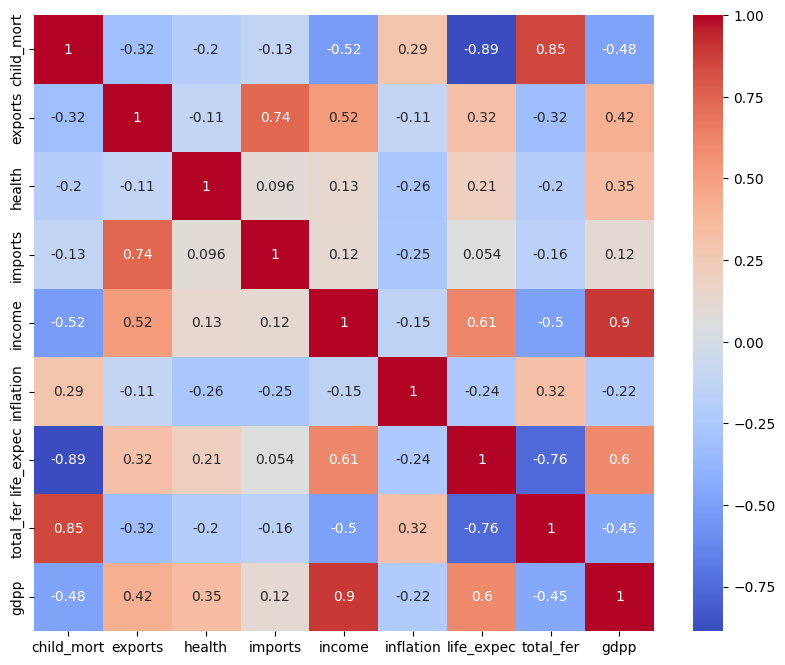

In [28]:
# put your answer here
# df_socio_economic_indicators = df[['exports', 'imports', 'income', 'gdpp']]

# corr = df_socio_economic_indicators.corr()

corr = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title

Identify 2–3 variables that appear strongly correlated `(10 pts)`
- Explain your observations in the text cell below.

### income and gdpp
#### Things to consider:
- **income** refers to the total earnings of a person in a year.
- **gdpp** refers to GDP per capita. It is calculated by dividing the GDP which is heavily based on the income of the people in the country, by the total population.

As the income of the citizens in the country increases or grows, so does the GDP per capita. As shown in the correlation matrix above, the gdpp and income garnered a 0.9 which means that both are highly related to one another.

In [56]:
world_average = df.mean()
print(world_average)

child_mort    38.270060
exports       41.108976
health         6.815689
imports       46.890215
income         0.132933
inflation      0.110820
life_expec    70.555689
total_fer      2.947964
gdpp           0.121536
dtype: float64


In [62]:
df_new = pd.DataFrame()

df_new["Health"] = (
    df['child_mort'] / df['child_mort'].mean() +
    df['health'] / df['health'].mean() +
    df['life_expec'] / df['life_expec'].mean() +
    df['total_fer'] / df['total_fer'].mean()
)

df_new['Trade'] = (
    df['imports'] / df['imports'].mean() +
    df['exports'] / df['exports'].mean()
)

df_new['Finance'] = (
    df['income'] / df['income'].mean() +
    df['gdpp'] / df['gdpp'].mean() +
    df['inflation'] / df['inflation'].mean()
)

df_new.head()

,Health,Trade,Finance
0,6.239852,1.200812,1.224099
1,3.035901,1.717580,1.592251
2,3.389763,1.603752,2.769079
3,6.469020,2.430387,2.798072
4,2.964898,2.362940,2.529389


In [65]:

fig = px.scatter_3d(df_new, x='Health', y='Finance', z='Trade')
fig.show()

## 6. Hierarchical Clustering

Compute and display a dendrogram using the linkage method `(10 pts)`
- Use `'ward'` linkage to minimize variance within clusters.

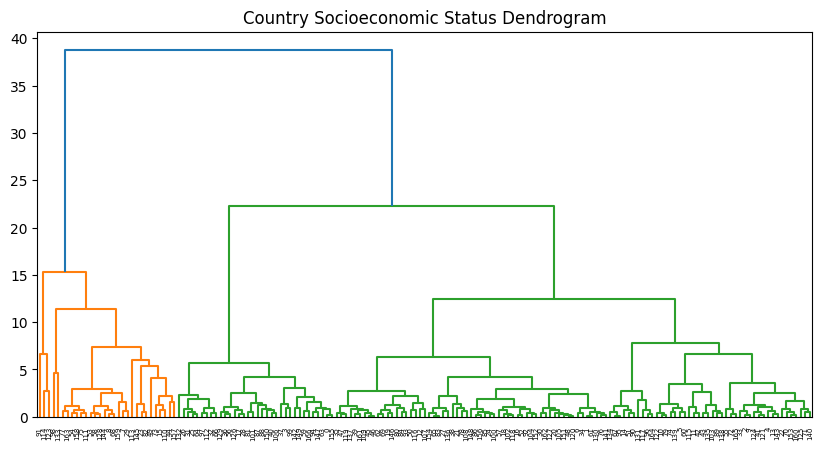

In [67]:
# put your answer here
from scipy.cluster.hierarchy import dendrogram, linkage

# df_dendogram_features =df[['exports', 'imports', 'income']]
# linkage_matrix = linkage(df_dendogram_features, method='ward')

linkage_matrix = linkage(df_new, method='ward')

Z =  linkage(df_new, method='ward')

plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Country Socioeconomic Status Dendrogram')
plt.show()

Based on the dendrogram, choose a reasonable number of clusters `(5 pts)`
- Write your chosen number below and explain your reasoning.

Based on the dendogram and 3d scatterplot, it can be argued that there are three number of clusters. As we can see, the blue, orange, and green clusters.

Perform Agglomerative Clustering using your chosen cluster count `(10 pts)`
- Attach the cluster labels back to the original dataframe.

In [ ]:
# put your answer here
cluster_A = AgglomerativeClustering(n_clusters=3, linkage='average')

model_clt = cluster_A.fit(df_new)
print(model_clt)

df_new['']

In [69]:

agg_cluster = AgglomerativeClustering(n_clusters=3, linkage="ward")
model_agg_cluster = agg_cluster.fit(df_new)
model_agg_cluster

AgglomerativeClustering(n_clusters=3)

In [70]:

print("Output Clusters are")
pred1 = model_agg_cluster.labels_
print(pred1)
unique, counts = np.unique(pred1, return_counts=True)
print(dict(zip(unique, counts)))

Output Clusters are
[2 1 1 2 1 1 1 0 0 1 1 1 1 1 1 0 1 2 1 1 1 1 1 0 1 2 2 1 2 0 1 2 2 1 1 1 2
 2 1 1 2 1 1 1 0 1 1 1 1 0 1 1 1 0 0 1 2 1 0 2 1 1 1 2 2 1 2 1 0 1 1 1 1 0
 1 0 1 0 1 1 1 2 0 1 1 1 1 2 2 1 1 0 1 1 2 1 1 2 0 2 1 2 1 1 1 1 2 1 1 1 0
 0 2 0 0 1 1 1 1 1 1 1 1 0 1 1 2 1 0 2 1 1 2 0 1 1 1 1 1 1 1 1 2 1 0 0 1 2
 1 2 2 1 1 1 1 2 1 0 0 0 1 1 1 0 1 1 2]
{np.int64(0): np.int64(30), np.int64(1): np.int64(103), np.int64(2): np.int64(34)}


## 7. Visualizing Cluster Results

Create a scatter plot using any 2 meaningful features, colored by cluster `(10 pts)`
- Choose variables that make socioeconomic sense (e.g., GDP per capita vs. life expectancy).

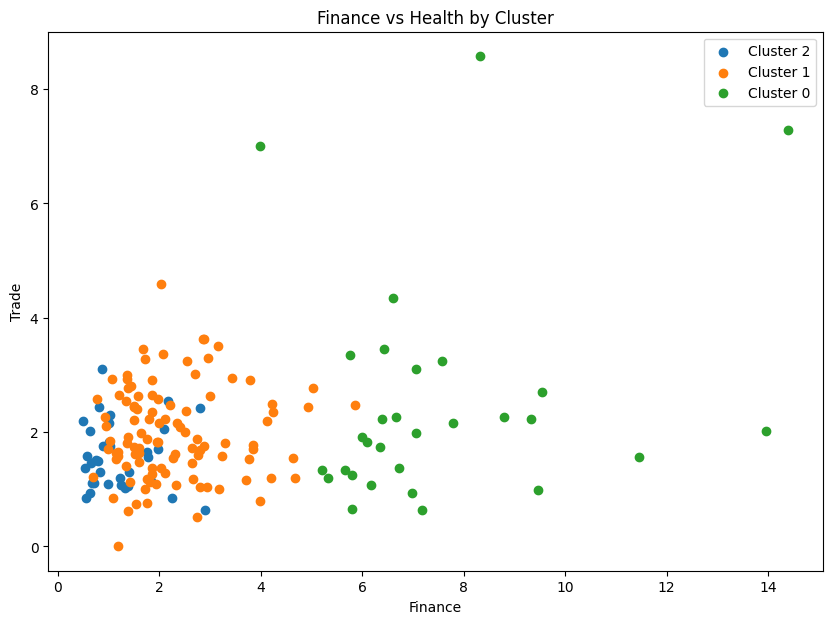

In [80]:
df_new['clusters'] = pred1 # Assign the cluster labels to a new column
unique_clusters = df_new['clusters'].unique()

plt.figure(figsize=(10, 7))
for cluster_label in unique_clusters:
    cluster_data = df_new[df_new['clusters'] == cluster_label]
    plt.scatter(cluster_data['Finance'], cluster_data['Trade'], label=f'Cluster {cluster_label}')

plt.xlabel('Finance')
plt.ylabel('Trade')
plt.title('Finance vs Health by Cluster')
plt.legend()
plt.show()

Describe the characteristics of each cluster `(5 pts)`
- What patterns can you infer about country groupings?

From the three clusters present, we can infer that there is a noticeable relationship between finance and trade in the dataset.

The blue cluster likely represents countries with lower earnings and weaker global economic presence, particularly in the trade of goods and essential commodities.

The orange cluster reflects nations in the middle ground countries that are developing, growing economically, and gradually strengthening their trade capabilities.

The green cluster appears to represent more advanced economies, countries with stronger financial stability but that does not mean that they have a more established role in global trade compared to developing nations.

Together, these clusters illustrate how financial standing may correlate with a country’s position and influence in international trade.

## 8. Reflection
Write a short reflection on what socioeconomic insights hierarchical clustering revealed about global development patterns. `(10 pts)`


Although there are a lot of factors to consider when classifying a countries economic status, by using the combination of various health, trade, and financial situations in a country, with Hierarchical clustering reveals that countries forms groups in terms of their stage of development. Whether it be an impoverished, developing, or developed nation, it reveals that there are patterns in how trading capabilities relates to their finances.

